In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Handling Missing Values of Numerical data

In [2]:
df = pd.read_csv('E:/Python Programs/Titanic_train_missing_value_using_Random_Sample_Imputation.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [10]:
X_train['Age_imputed'].isnull()

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584     True
493    False
527     True
168     True
Name: Age_imputed, Length: 712, dtype: bool

In [11]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [12]:
X_train['Age'].isnull().sum()

148

In [13]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([40.  , 30.  , 28.  , 40.  , 22.  , 34.  , 38.  , 17.  , 42.  ,
       41.  , 15.  , 35.  , 38.  , 30.  , 47.  , 22.  , 28.  , 60.  ,
       25.  , 24.  , 45.  , 36.  , 28.  , 23.  , 21.  , 37.  , 18.  ,
       21.  , 29.  , 31.  , 62.  , 45.  , 36.  , 20.  ,  4.  , 24.  ,
       22.  , 19.  , 26.  , 34.  ,  7.  , 45.5 , 40.  , 29.  , 40.  ,
       30.  , 52.  , 24.  , 49.  , 17.  , 11.  , 17.  , 58.  , 35.  ,
       28.  , 54.  , 39.  , 52.  , 16.  , 22.  , 44.  , 21.  , 26.  ,
       33.  , 22.  ,  2.  , 40.  , 50.  ,  4.  , 20.  , 27.  , 41.  ,
       16.  , 50.  , 70.  , 24.  ,  1.  , 36.  ,  0.75, 51.  , 30.  ,
       42.  ,  3.  , 20.  , 46.  , 44.  , 32.5 , 31.  , 39.  , 50.  ,
       39.  , 30.5 , 39.  , 20.  , 24.  , 27.  , 14.  , 25.  , 61.  ,
       26.  , 35.  , 43.  , 21.  , 65.  ,  5.  , 56.  , 29.  , 65.  ,
       40.5 , 19.  , 25.  ,  3.  , 32.  , 16.  , 26.  , 49.  , 58.  ,
       26.  , 23.  , 30.  , 13.  , 54.  , 42.  , 16.  , 61.  , 19.  ,
       50.  , 34.  ,

In [14]:
# Dropping all null values from X_train['Age'] column and selecting a random Age value from the same X_train['Age'] Column among the existing values
# and imputing them to X_train['Age_imputed'] column.

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [15]:
# Now we can see that Missing values in Age column has been replaced with a random value in Age_Imputed column.

X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,32.0
493,71.0,49.5042,71.0
527,NaN,221.7792,4.0


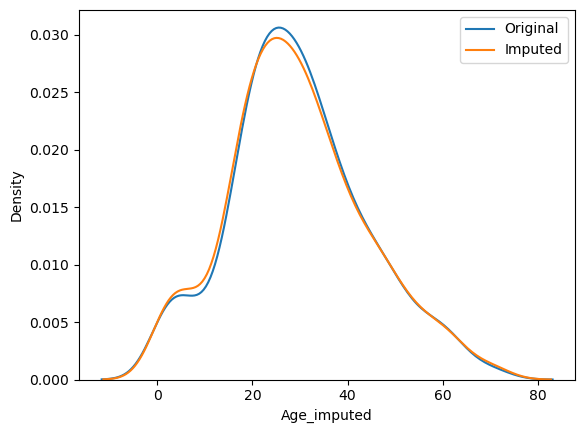

In [16]:
# As we can see that there is nothing much of a change in the distribution of the data. 

sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [17]:
# we can see that there is nothing much of a change in the variance value also.

print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  211.59802228543435


In [18]:
# But there is a change in the co-variance when we compared, "Age column relationship with Fare column is 71.512440" and 
# "Age_Imputed column relationship with with Fare column is 47.943761'.
# Note:- You need to see the table like you see the Confusion Matrix in order to understand the relationship.

X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,47.943761
Age,71.512440,204.349513,204.349513
Age_imputed,47.943761,204.349513,211.598022


<Axes: >

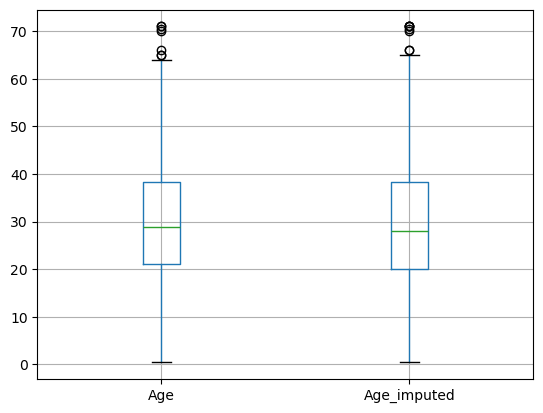

In [19]:
X_train[['Age', 'Age_imputed']].boxplot()

In [20]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

## Handing Missing Values of Categorical Data

In [21]:
data = pd.read_csv('E:/Python Programs/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [22]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [23]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [24]:
X = data
y = data['SalePrice']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [27]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
189,Gd,TA,286000,TA,Gd
623,TA,TA,168500,TA,TA
536,NaN,TA,188000,TA,NaN
966,TA,TA,160000,TA,TA
1393,TA,Gd,163000,Gd,TA


In [28]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [29]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [30]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [31]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.639731
TA,0.412439,0.545455
Fa,0.040917,0.056117
Po,0.027823,0.037037
Ex,0.024550,0.032548


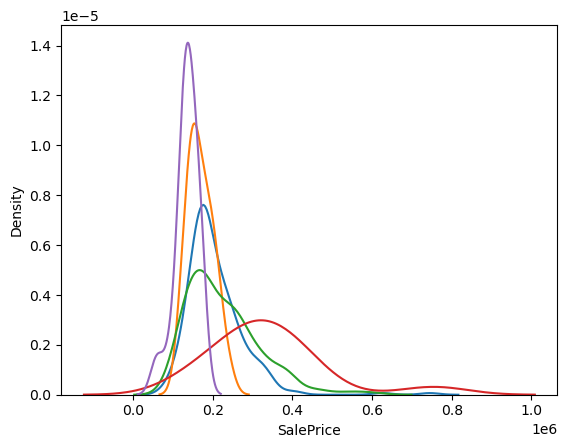

In [32]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

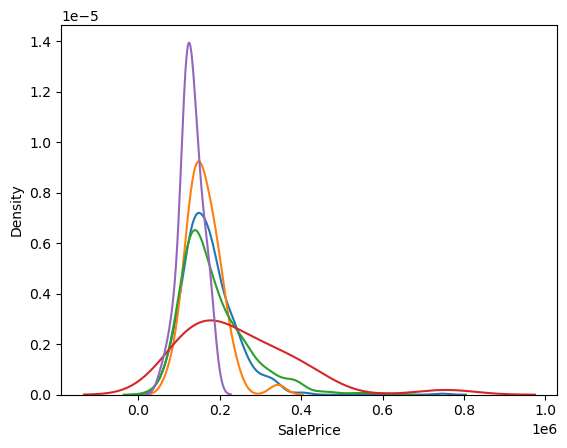

In [33]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()